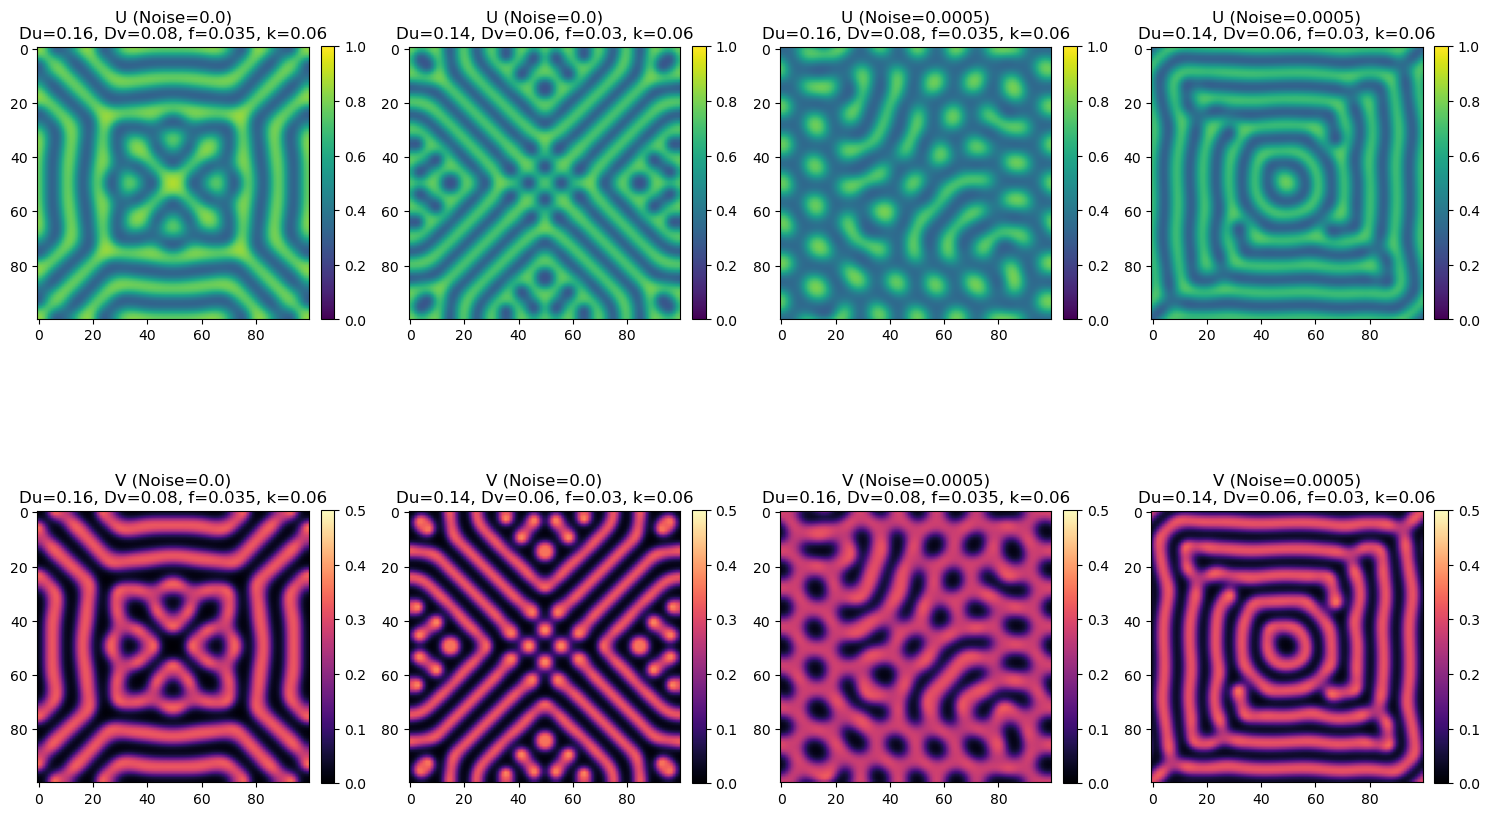

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from src.Question_D_funcs import run_simulation

# πarameters
size = 100  
dx = 1
dt = 1
steps = 10000  # σimulation steps
parameter_sets = [
    (0.16, 0.08, 0.035, 0.060),
    (0.14, 0.06, 0.030, 0.060),
]

save_folder = "fig"
os.makedirs(save_folder, exist_ok=True)

# create figure
fig, axes = plt.subplots(2, len(parameter_sets) * 2, figsize=(15, 10))  

noise_levels = [0.0, 0.0005]

for noise_idx, noise in enumerate(noise_levels):
    results = run_simulation(size, steps, parameter_sets, dx, dt, noise)
    
    for col, (u, v, Du, Dv, f, k, noise) in enumerate(results):
        col_index = col + noise_idx * len(parameter_sets)  
        
        # Plot U
        im_u = axes[0, col_index].imshow(u, cmap='viridis', vmin=0, vmax=1)
        axes[0, col_index].set_title(f"U (Noise={noise})\nDu={Du}, Dv={Dv}, f={f}, k={k}")
        fig.colorbar(im_u, ax=axes[0, col_index], fraction=0.046, pad=0.04)

        # Plot V
        im_v = axes[1, col_index].imshow(v, cmap='magma', vmin=0, vmax=0.5)
        axes[1, col_index].set_title(f"V (Noise={noise})\nDu={Du}, Dv={Dv}, f={f}, k={k}")
        fig.colorbar(im_v, ax=axes[1, col_index], fraction=0.046, pad=0.04)

plt.tight_layout()

# save figure
save_path = os.path.join(save_folder, "Question D.png")
plt.savefig(save_path, dpi=300)

plt.show()
